In [101]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [70]:
train_images = pd.read_csv('../input/ahcd1/csvTrainImages 13440x1024.csv')
train_label = pd.read_csv('../input/ahcd1/csvTrainLabel 13440x1.csv')

test_images = pd.read_csv('../input/ahcd1/csvTestImages 3360x1024.csv')
test_label = pd.read_csv('../input/ahcd1/csvTestLabel 3360x1.csv')

In [71]:
train_images = train_images.iloc[:,:].values
train_label = train_label.iloc[:,:].values

test_images = test_images.iloc[:,:].values
test_label = test_label.iloc[:,:].values

In [72]:
train_images[0].shape

(1024,)

In [73]:
train_label[0]

array([1])

In [74]:
train_images.shape

(13439, 1024)

In [75]:
train_images = train_images.reshape(train_images.shape[0], 32, 32)
test_images = test_images.reshape(test_images.shape[0],32,32)

In [76]:
print("Train images shape: ",train_images.shape)
print("Train labels shape: ",train_label.shape)

print("Test images shape: ",test_images.shape)
print("Test labels shape: ",test_label.shape)

Train images shape:  (13439, 32, 32)
Train labels shape:  (13439, 1)
Test images shape:  (3359, 32, 32)
Test labels shape:  (3359, 1)


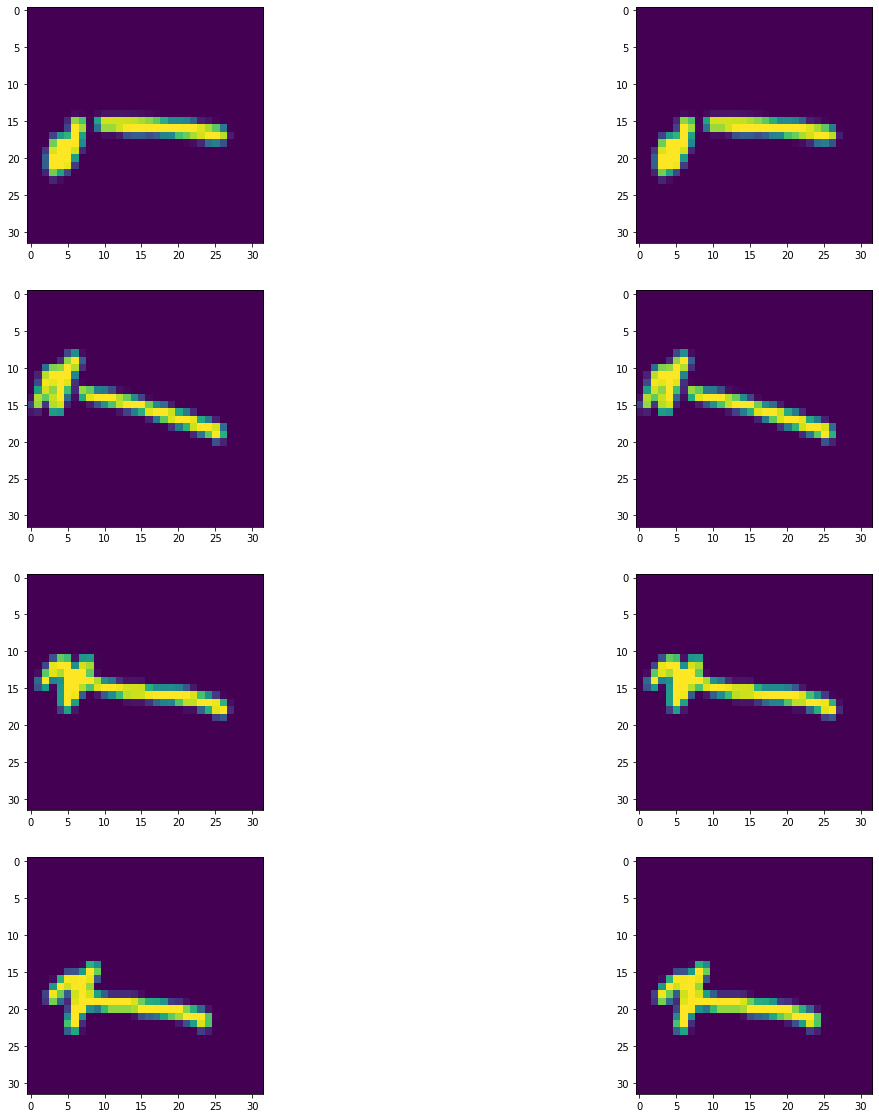

In [77]:
fig, ax = plt.subplots(4,2,figsize=(20,20))

for i in range(4):
    for j in range(2):
        ax[i,j].imshow(train_images[i])

In [78]:
train_images.max()

255

In [79]:
train_images.min()

0

In [80]:
train_label.max()

28

In [81]:
#Normalize 

train_images = train_images/255.0
test_images = test_images/255.0

In [82]:
train_images.max()

1.0

In [83]:
len(train_images)

13439

In [84]:
X_train = train_images[1000:]
X_valid = train_images[:1000]

y_train = train_label[1000:]
y_valid = train_label[:1000]

In [85]:
num_classes = len(np.unique(train_label)) + 1
num_classes

29

In [86]:
X_test = test_images[:]
y_test = test_label[:]

In [87]:
y_train = to_categorical(y_train,num_classes)
y_valid = to_categorical(y_valid,num_classes)
y_test = to_categorical(y_test,num_classes)

In [88]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [89]:
print("X train shape: ",X_train.shape)

X train shape:  (12439, 32, 32)


In [90]:
print("Training samples: ",X_train.shape[0])
print("Validation samples: ",X_valid.shape[0])
print("Testing samples: ",X_test.shape[0])

Training samples:  12439
Validation samples:  1000
Testing samples:  3359


In [91]:
X_train = X_train.reshape([-1, 32, 32, 1])
X_test = X_test.reshape([-1, 32, 32, 1])
X_valid = X_valid.reshape([-1, 32, 32, 1])

In [92]:
X_train.shape

(12439, 32, 32, 1)

In [93]:
model = Sequential()

In [94]:
X_train.shape[1:]

(32, 32, 1)

In [95]:
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,1)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

In [96]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
Total params: 10,416
Trainable params: 10,416
Non-trainable params: 0
__________________________________________________

In [97]:
model.add(Flatten())

In [98]:
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(29,activation='softmax'))

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [100]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [102]:
data_gen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

In [103]:
data_gen.fit(X_train)

In [112]:
batch_size=128

history = model.fit_generator(data_gen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=100, verbose=2,
                    validation_data=(X_valid, y_valid),
                    validation_steps=X_valid.shape[0] // batch_size)

Epoch 1/100
 - 7s - loss: 0.8946 - accuracy: 0.6848 - val_loss: 0.9438 - val_accuracy: 0.6710
Epoch 2/100
 - 7s - loss: 0.8386 - accuracy: 0.6984 - val_loss: 0.9112 - val_accuracy: 0.7100
Epoch 3/100
 - 7s - loss: 0.7864 - accuracy: 0.7145 - val_loss: 0.9028 - val_accuracy: 0.7050
Epoch 4/100
 - 6s - loss: 0.7655 - accuracy: 0.7308 - val_loss: 0.8494 - val_accuracy: 0.7370
Epoch 5/100
 - 6s - loss: 0.7245 - accuracy: 0.7479 - val_loss: 0.9061 - val_accuracy: 0.7280
Epoch 6/100
 - 6s - loss: 0.6947 - accuracy: 0.7535 - val_loss: 0.8669 - val_accuracy: 0.7330
Epoch 7/100
 - 6s - loss: 0.6715 - accuracy: 0.7638 - val_loss: 0.7672 - val_accuracy: 0.7710
Epoch 8/100
 - 6s - loss: 0.6317 - accuracy: 0.7765 - val_loss: 0.7839 - val_accuracy: 0.7570
Epoch 9/100
 - 6s - loss: 0.6086 - accuracy: 0.7825 - val_loss: 0.7522 - val_accuracy: 0.7620
Epoch 10/100
 - 6s - loss: 0.5987 - accuracy: 0.7901 - val_loss: 0.8024 - val_accuracy: 0.7580
Epoch 11/100
 - 7s - loss: 0.5674 - accuracy: 0.8023 - val_

Epoch 88/100
 - 6s - loss: 0.2198 - accuracy: 0.9288 - val_loss: 0.5512 - val_accuracy: 0.8860
Epoch 89/100
 - 6s - loss: 0.2115 - accuracy: 0.9312 - val_loss: 0.4355 - val_accuracy: 0.9070
Epoch 90/100
 - 6s - loss: 0.2078 - accuracy: 0.9354 - val_loss: 0.3930 - val_accuracy: 0.9030
Epoch 91/100
 - 6s - loss: 0.2095 - accuracy: 0.9364 - val_loss: 0.5387 - val_accuracy: 0.8780
Epoch 92/100
 - 6s - loss: 0.2158 - accuracy: 0.9321 - val_loss: 0.4203 - val_accuracy: 0.9090
Epoch 93/100
 - 6s - loss: 0.2098 - accuracy: 0.9315 - val_loss: 0.4429 - val_accuracy: 0.9130
Epoch 94/100
 - 6s - loss: 0.2139 - accuracy: 0.9322 - val_loss: 0.4388 - val_accuracy: 0.9000
Epoch 95/100
 - 6s - loss: 0.2134 - accuracy: 0.9331 - val_loss: 0.4940 - val_accuracy: 0.8970
Epoch 96/100
 - 7s - loss: 0.2046 - accuracy: 0.9329 - val_loss: 0.4737 - val_accuracy: 0.9000
Epoch 97/100
 - 6s - loss: 0.2065 - accuracy: 0.9376 - val_loss: 0.7114 - val_accuracy: 0.8820
Epoch 98/100
 - 6s - loss: 0.2104 - accuracy: 0.93

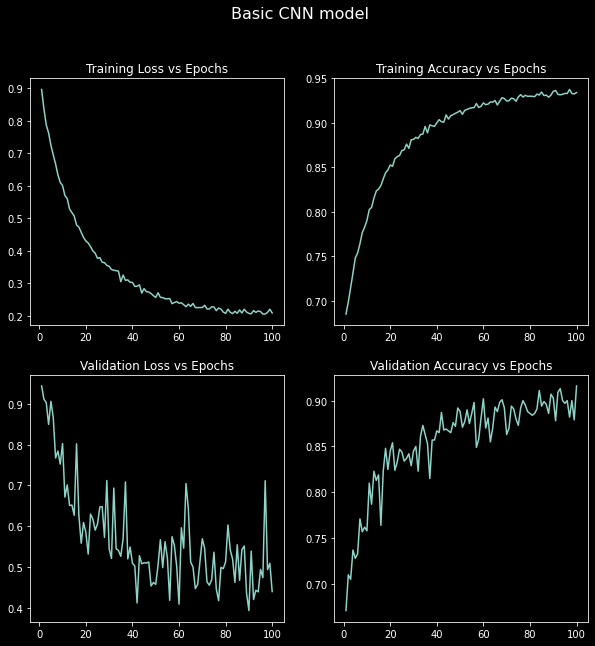

In [113]:
plt.style.use('dark_background')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 101), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 101), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 101), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 101), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
fig.suptitle('Basic CNN model', size=16)
plt.show()

In [117]:
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1]*100)
print('\n', 'Total test Loss:', score[0]*100)


 Test accuracy: 94.70080137252808

 Total test Loss: 20.35157647362047
